In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import plot_roc_curve, mean_absolute_percentage_error, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv('website.csv')
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


# DATA UNDERSTANDING

In [3]:
data.shape

(36992, 25)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,36992.0,37.118161,15.867412,10.000000,23.0000,37.000,51.000,64.000000
days_since_last_login,36992.0,-41.915576,228.819900,-999.000000,8.0000,12.000,16.000,26.000000
avg_time_spent,36992.0,243.472334,398.289149,-2814.109110,60.1025,161.765,356.515,3235.578521
avg_transaction_value,36992.0,29271.194003,19444.806226,800.460000,14177.5400,27554.485,40855.110,99914.050000
points_in_wallet,33549.0,686.882199,194.063624,-760.661236,616.1500,697.620,763.950,2069.069761
churn_risk_score,36992.0,3.463397,1.409661,-1.000000,3.0000,4.000,5.000,5.000000


In [6]:
data.dtypes

customer_id                      object
Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64


In [7]:
# Check the frequency distribution of categorical variables
print(f"{data['gender'].value_counts()}"+"\n")
print(f"{data['region_category'].value_counts()}"+"\n")
print(f"{data['membership_category'].value_counts()}"+"\n")
print(f"{data['offer_application_preference'].value_counts()}"+"\n")
print(f"{data['past_complaint'].value_counts()}"+"\n")
print(f"{data['complaint_status'].value_counts()}"+"\n")
print(f"{data['feedback'].value_counts()}"+"\n")
print(data['joined_through_referral'].value_counts())

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64

Yes    20440
No     16552
Name: offer_application_preference, dtype: int64

No     18602
Yes    18390
Name: past_complaint, dtype: int64

Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: complaint_status, dtype: int64

Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Custom

In [8]:
# Check for missing values
data.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [9]:
data=data.dropna()
data.shape

(28373, 25)

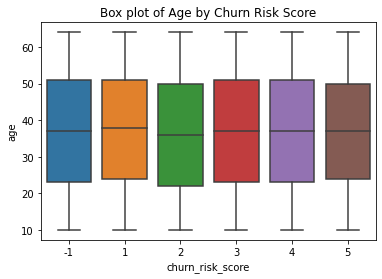

In [10]:
# Plot a boxplot of age by churn
sns.boxplot(x='churn_risk_score', y='age', data=data)
plt.title("Box plot of Age by Churn Risk Score")
plt.show()

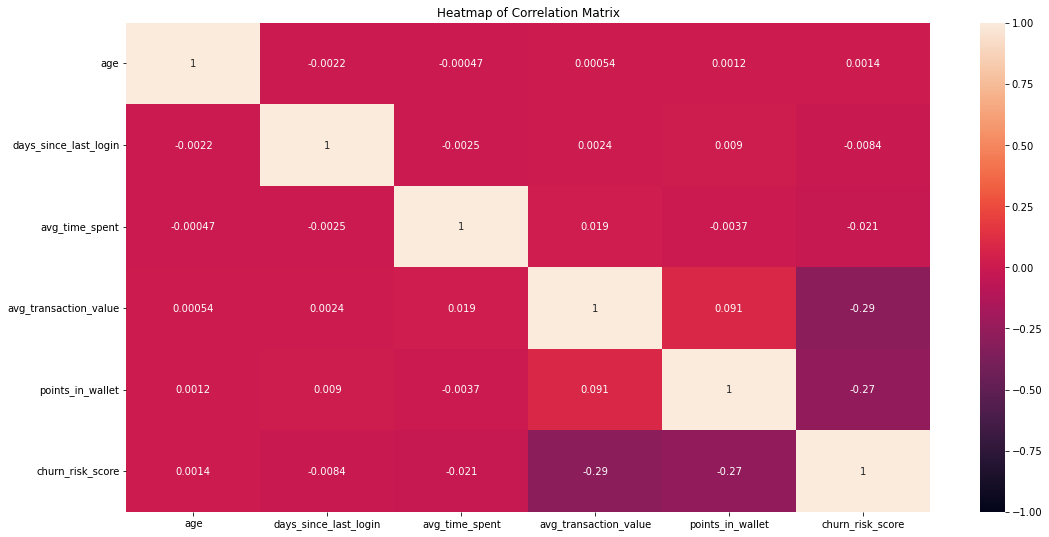

In [11]:
# Plot a heatmap of the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(),xticklabels=corr_matrix.columns,yticklabels=corr_matrix.columns,vmin=-1,vmax=1,annot=True)
plt.title("Heatmap of Correlation Matrix")
plt.show()

In [12]:
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    
    #mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()
num_feat = data.select_dtypes(exclude = 'object')

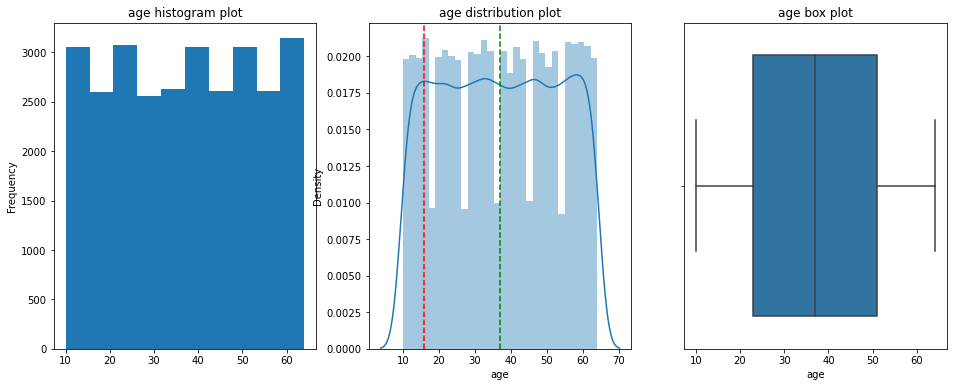

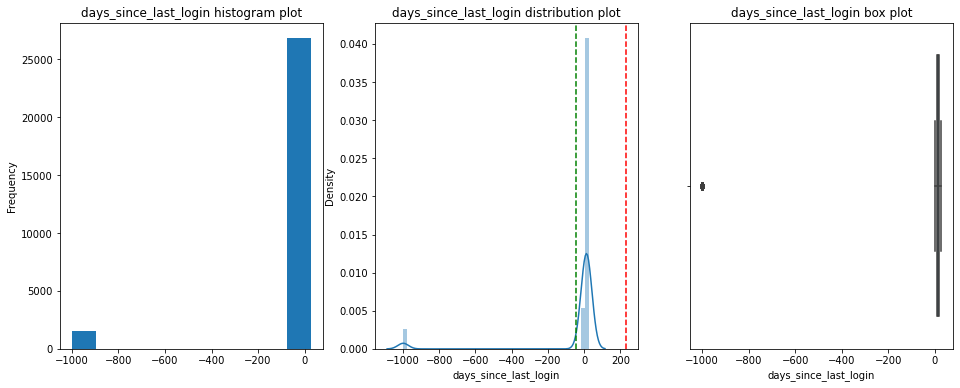

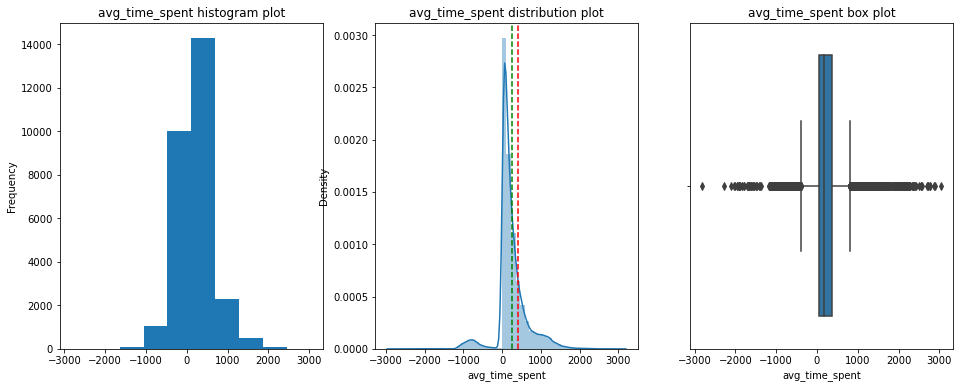

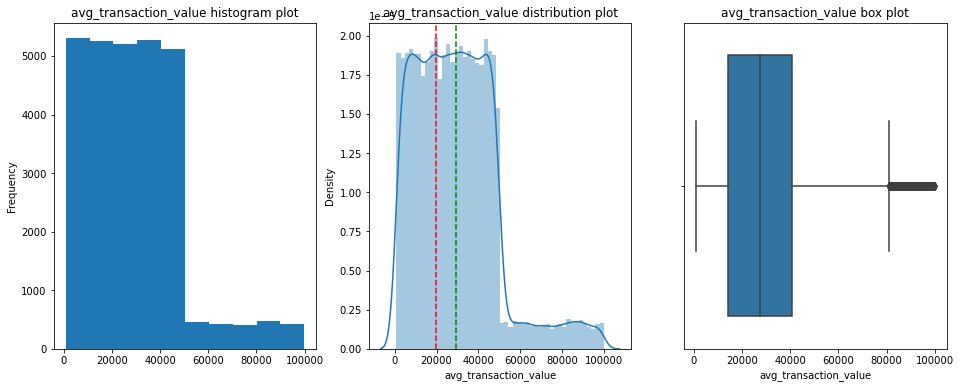

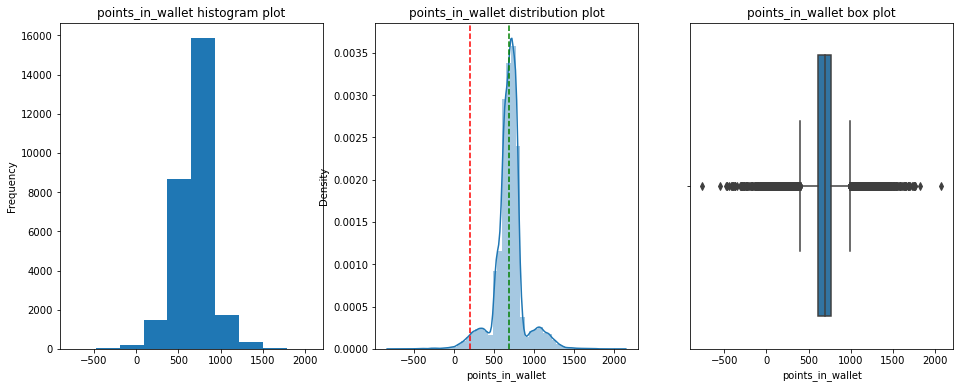

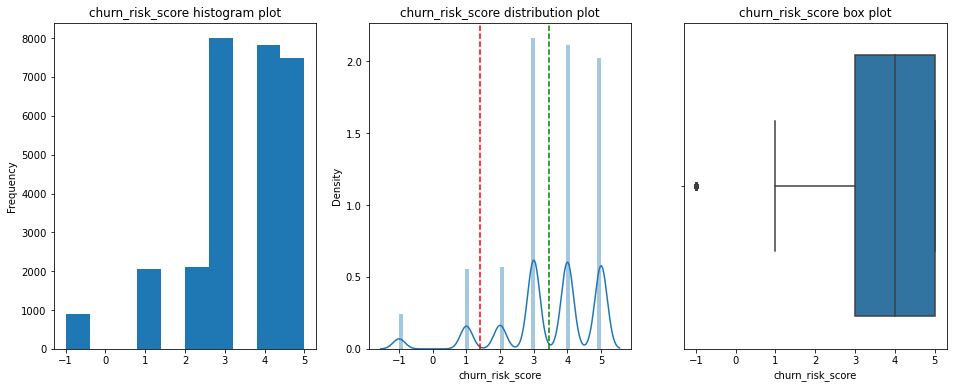

In [13]:
for i in num_feat.columns:
    feat_plot(num_feat[i])

# DATA PREPARATİON

In [14]:
data.churn_risk_score.value_counts()

 3    7998
 4    7814
 5    7499
 2    2116
 1    2045
-1     901
Name: churn_risk_score, dtype: int64

In [15]:
# Drop rows with churn_risk_score equal to -1
data = data.drop(data.loc[data['churn_risk_score'] == -1].index)
data.shape

(27472, 25)

In [16]:
data.days_since_last_login.value_counts()

 12     1781
 13     1729
 14     1717
 11     1702
 15     1691
 10     1535
 16     1527
-999    1509
 9      1381
 17     1313
 8      1150
 7      1066
 18     1044
 19      997
 5       923
 6       919
 20      865
 21      757
 4       744
 22      662
 3       654
 23      538
 2       455
 24      349
 1       255
 25      154
 26       55
Name: days_since_last_login, dtype: int64

In [17]:
# Drop rows with churn_risk_score equal to -999
data = data.drop(data.loc[data['days_since_last_login'] == -999].index)
data.shape

(25963, 25)

In [18]:
data.avg_time_spent[data.avg_time_spent<0]

28       -936.744818
41       -930.207844
60       -615.344319
79       -687.629574
117      -771.415609
            ...     
36740    -940.222528
36760   -1020.419009
36819    -910.568433
36956    -746.034591
36988    -638.123421
Name: avg_time_spent, Length: 1235, dtype: float64

In [19]:
# Drop rows with avg_time_spent less than 0
data = data.drop(data.loc[data['avg_time_spent'] < 0 ].index)
data.shape

(24728, 25)

In [20]:
data.points_in_wallet[data.points_in_wallet<0]

67      -549.357498
213      -38.084314
837     -184.519595
919     -243.016692
1929      -8.468228
            ...    
35147    -57.241893
35411   -108.057352
35943    -43.109270
36414   -170.497210
36790   -317.024955
Name: points_in_wallet, Length: 97, dtype: float64

In [21]:
# Drop rows with points_in_wallet less than 0
data = data.drop(data.loc[data['points_in_wallet'] < 0 ].index)
data.shape

(24631, 25)

In [22]:
data.gender.value_counts()

F          12349
M          12246
Unknown       36
Name: gender, dtype: int64

In [23]:
# Drop rows with gender Unknown
data = data.drop(data.loc[data['gender'] == "Unknown" ].index)
data.shape

(24595, 25)

In [24]:
data.region_category.value_counts()

Town       11056
City        9839
Village     3700
Name: region_category, dtype: int64

In [25]:
data.membership_category.value_counts()

Basic Membership       5107
No Membership          5070
Gold Membership        4524
Silver Membership      4028
Premium Membership     2967
Platinum Membership    2899
Name: membership_category, dtype: int64

In [26]:
data.joined_through_referral.value_counts()

No     10604
Yes    10391
?       3600
Name: joined_through_referral, dtype: int64

In [27]:
# Drop rows with joined_through_referral ?
data = data.drop(data.loc[data['joined_through_referral'] == "?" ].index)
data.shape

(20995, 25)

In [28]:
data.preferred_offer_types.value_counts()

Credit/Debit Card Offers    7047
Gift Vouchers/Coupons       7021
Without Offers              6927
Name: preferred_offer_types, dtype: int64

In [29]:
data.medium_of_operation.value_counts()

Smartphone    7924
Desktop       7850
?             3049
Both          2172
Name: medium_of_operation, dtype: int64

In [30]:
# Drop rows with medium_of_operation ?
data = data.drop(data.loc[data['medium_of_operation'] == "?" ].index)
data.shape

(17946, 25)

In [31]:
data.internet_option.value_counts()

Mobile_Data    6000
Fiber_Optic    6000
Wi-Fi          5946
Name: internet_option, dtype: int64

In [32]:
data.avg_frequency_login_days.value_counts()

Error                  1693
13.0                    691
14.0                    672
10.0                    668
16.0                    662
                       ... 
28.910535036296746        1
56.16197924247753         1
-8.26411518543324         1
-16.694641617568223       1
27.8399274405269          1
Name: avg_frequency_login_days, Length: 803, dtype: int64

In [33]:
# Drop rows with avg_frequency_login_days Error
data = data.drop(data.loc[data['avg_frequency_login_days'] == "Error" ].index)
data.shape

(16253, 25)

In [34]:
data.avg_frequency_login_days=data.avg_frequency_login_days.astype('float')

In [35]:
data.avg_frequency_login_days

2        22.0
3         6.0
4        16.0
6        28.0
10        8.0
         ... 
36983    11.0
36984     2.0
36985     7.0
36986    16.0
36990    20.0
Name: avg_frequency_login_days, Length: 16253, dtype: float64

In [36]:
# Drop rows with avg_frequency_login_days less than 0
data = data.drop(data.loc[data['avg_frequency_login_days'] < 0 ].index)
data.shape

(15927, 25)

In [37]:
data.used_special_discount.value_counts()

Yes    8770
No     7157
Name: used_special_discount, dtype: int64

In [38]:
data.offer_application_preference.value_counts()

Yes    8791
No     7136
Name: offer_application_preference, dtype: int64

In [39]:
data.past_complaint.value_counts()

No     7977
Yes    7950
Name: past_complaint, dtype: int64

In [40]:
data.complaint_status.value_counts()

Not Applicable              7977
Solved                      2014
Unsolved                    2013
Solved in Follow-up         1984
No Information Available    1939
Name: complaint_status, dtype: int64

In [41]:
data.feedback.value_counts()

Poor Website                2712
Too many ads                2709
Poor Product Quality        2707
Poor Customer Service       2699
No reason specified         2659
Reasonable Price             628
User Friendly Website        624
Quality Customer Care        602
Products always in Stock     587
Name: feedback, dtype: int64

In [42]:
# Drop irrelevant columns 
data.drop(["customer_id","Name","security_no","referral_id","joining_date","last_visit_time"],axis=1,inplace=True)
data

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5
6,21,M,Town,Gold Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,10,55.38,8982.50,28.0,756.210000,Yes,No,Yes,Solved in Follow-up,No reason specified,3
10,25,F,Village,Basic Membership,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,14,570.23,35119.93,8.0,699.700000,Yes,Yes,No,Not Applicable,Poor Product Quality,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36983,45,M,Town,Basic Membership,Yes,Without Offers,Smartphone,Wi-Fi,9,49.33,45358.49,11.0,242.979625,Yes,No,No,Not Applicable,Poor Customer Service,5
36984,51,M,Town,Gold Membership,No,Without Offers,Desktop,Fiber_Optic,24,312.33,63446.71,2.0,778.700000,No,Yes,No,Not Applicable,Products always in Stock,1
36985,12,F,Village,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Fiber_Optic,13,418.38,56397.21,7.0,725.890000,Yes,Yes,Yes,Unsolved,Products always in Stock,2
36986,27,M,Town,Platinum Membership,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,13,135.83,8225.68,16.0,748.570000,Yes,No,No,Not Applicable,No reason specified,3


In [43]:
# Create a LabelEncoder object
le = LabelEncoder()

# Encode categorical variables
data["gender"] = le.fit_transform(data["gender"])
data["region_category"] = le.fit_transform(data["region_category"])
data["membership_category"] = le.fit_transform(data["membership_category"])
data["joined_through_referral"] = le.fit_transform(data["joined_through_referral"])
data["preferred_offer_types"] = le.fit_transform(data["preferred_offer_types"])
data["medium_of_operation"] = le.fit_transform(data["medium_of_operation"])
data["internet_option"] = le.fit_transform(data["internet_option"])
data["used_special_discount"] = le.fit_transform(data["used_special_discount"])
data["offer_application_preference"] = le.fit_transform(data["offer_application_preference"])
data["past_complaint"] = le.fit_transform(data["past_complaint"])
data["complaint_status"] = le.fit_transform(data["complaint_status"])
data["feedback"] = le.fit_transform(data["feedback"])


# Create dummy variables for the encoded categorical columns
df_encoded = pd.get_dummies(data, columns=["gender","region_category", "membership_category","joined_through_referral","preferred_offer_types","medium_of_operation","internet_option","used_special_discount","offer_application_preference","past_complaint","complaint_status","feedback"])
data=df_encoded
data.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,gender_0,gender_1,region_category_0,...,complaint_status_4,feedback_0,feedback_1,feedback_2,feedback_3,feedback_4,feedback_5,feedback_6,feedback_7,feedback_8
2,44,14,516.16,21027.00,22.0,500.69,5,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,37,11,53.27,25239.56,6.0,567.66,5,0,1,1,...,1,0,0,0,1,0,0,0,0,0
4,31,20,113.13,24483.66,16.0,663.06,5,1,0,1,...,0,0,0,0,1,0,0,0,0,0
6,21,10,55.38,8982.50,28.0,756.21,3,0,1,0,...,0,1,0,0,0,0,0,0,0,0
10,25,14,570.23,35119.93,8.0,699.70,5,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
data.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'churn_risk_score', 'gender_0', 'gender_1', 'region_category_0',
       'region_category_1', 'region_category_2', 'membership_category_0',
       'membership_category_1', 'membership_category_2',
       'membership_category_3', 'membership_category_4',
       'membership_category_5', 'joined_through_referral_0',
       'joined_through_referral_1', 'preferred_offer_types_0',
       'preferred_offer_types_1', 'preferred_offer_types_2',
       'medium_of_operation_0', 'medium_of_operation_1',
       'medium_of_operation_2', 'internet_option_0', 'internet_option_1',
       'internet_option_2', 'used_special_discount_0',
       'used_special_discount_1', 'offer_application_preference_0',
       'offer_application_preference_1', 'past_complaint_0',
       'past_complaint_1', 'complaint_status_0', 'complaint_status_1',
       'complaint_status_2', 'co

In [45]:
# Turning churn_risk_score to binary if it is equal and more than 4, it is high risk churn (1), otherwise low risk churn(0)
data.churn_risk_score[data['churn_risk_score']== 1]
data.churn_risk_score=np.where(data['churn_risk_score'] >= 4 , 1, 0)
data.churn_risk_score.value_counts()

1    8839
0    7088
Name: churn_risk_score, dtype: int64

In [46]:
y=data['churn_risk_score'].values
X=data.drop(["churn_risk_score"],axis=1)

In [47]:
X

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,gender_0,gender_1,region_category_0,region_category_1,...,complaint_status_4,feedback_0,feedback_1,feedback_2,feedback_3,feedback_4,feedback_5,feedback_6,feedback_7,feedback_8
2,44,14,516.16,21027.00,22.0,500.690000,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,37,11,53.27,25239.56,6.0,567.660000,0,1,1,0,...,1,0,0,0,1,0,0,0,0,0
4,31,20,113.13,24483.66,16.0,663.060000,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
6,21,10,55.38,8982.50,28.0,756.210000,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
10,25,14,570.23,35119.93,8.0,699.700000,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36983,45,9,49.33,45358.49,11.0,242.979625,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
36984,51,24,312.33,63446.71,2.0,778.700000,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
36985,12,13,418.38,56397.21,7.0,725.890000,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
36986,27,13,135.83,8225.68,16.0,748.570000,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0


In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15927 entries, 2 to 36990
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             15927 non-null  int64  
 1   days_since_last_login           15927 non-null  int64  
 2   avg_time_spent                  15927 non-null  float64
 3   avg_transaction_value           15927 non-null  float64
 4   avg_frequency_login_days        15927 non-null  float64
 5   points_in_wallet                15927 non-null  float64
 6   gender_0                        15927 non-null  uint8  
 7   gender_1                        15927 non-null  uint8  
 8   region_category_0               15927 non-null  uint8  
 9   region_category_1               15927 non-null  uint8  
 10  region_category_2               15927 non-null  uint8  
 11  membership_category_0           15927 non-null  uint8  
 12  membership_category_1           

# MODELLING

In [49]:
list_m=[]

# Logistic Regression 

In [50]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

In [51]:
pipe = Pipeline([('Classifier', LogisticRegression())])


search_space = [{'Classifier': [LogisticRegression(solver='liblinear')],
                 'Classifier__C': np.logspace(-4, 4, 30),
                 'Classifier__penalty':['l1','l2']}]

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('Classifier',
   LogisticRegression(C=0.38566204211634725, penalty='l1', solver='liblinear'))],
 'verbose': False,
 'Classifier': LogisticRegression(C=0.38566204211634725, penalty='l1', solver='liblinear'),
 'Classifier__C': 0.38566204211634725,
 'Classifier__class_weight': None,
 'Classifier__dual': False,
 'Classifier__fit_intercept': True,
 'Classifier__intercept_scaling': 1,
 'Classifier__l1_ratio': None,
 'Classifier__max_iter': 100,
 'Classifier__multi_class': 'auto',
 'Classifier__n_jobs': None,
 'Classifier__penalty': 'l1',
 'Classifier__random_state': None,
 'Classifier__solver': 'liblinear',
 'Classifier__tol': 0.0001,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [52]:
best_model.best_params_

{'Classifier': LogisticRegression(C=0.38566204211634725, penalty='l1', solver='liblinear'),
 'Classifier__C': 0.38566204211634725,
 'Classifier__penalty': 'l1'}

In [53]:
model=LogisticRegression(C=0.38566204211634725,penalty='l1',solver='liblinear')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
dic_log={}
dic_log['name']='Logistic'
dic_log['Accuracy']=accuracy_score(y_test, y_pred)
dic_log['Precision']=precision_score(y_test, y_pred, average='weighted')
dic_log['Re-call']=recall_score(y_test, y_pred, average='weighted')
dic_log['F1-Score']=f1_score(y_test, y_pred, average='weighted')
dic_log['Cohens-Kappa']=cohen_kappa_score(y_test, y_pred)
dic_log['Mape']=mean_absolute_percentage_error(y_test, y_pred)
list_m.append(dic_log)

Accuracy: 0.9381669805398619


# KNN

In [54]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

In [55]:
pipe = Pipeline([('Classifier', KNeighborsClassifier())])


search_space = [{'Classifier': [KNeighborsClassifier()],
                 'Classifier__n_neighbors':[2,3,4,5,6]}]


clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('Classifier', KNeighborsClassifier(n_neighbors=3))],
 'verbose': False,
 'Classifier': KNeighborsClassifier(n_neighbors=3),
 'Classifier__algorithm': 'auto',
 'Classifier__leaf_size': 30,
 'Classifier__metric': 'minkowski',
 'Classifier__metric_params': None,
 'Classifier__n_jobs': None,
 'Classifier__n_neighbors': 3,
 'Classifier__p': 2,
 'Classifier__weights': 'uniform'}

In [56]:
best_model.best_params_

{'Classifier': KNeighborsClassifier(n_neighbors=3),
 'Classifier__n_neighbors': 3}

In [57]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
dic_knn={}
dic_knn['name']='KNN'
dic_knn['Accuracy']=accuracy_score(y_test, y_pred)
dic_knn['Precision']=precision_score(y_test, y_pred, average='weighted')
dic_knn['Re-call']=recall_score(y_test, y_pred, average='weighted')
dic_knn['F1-Score']=f1_score(y_test, y_pred, average='weighted')
dic_knn['Cohens-Kappa']=cohen_kappa_score(y_test, y_pred)
dic_knn['Mape']=mean_absolute_percentage_error(y_test, y_pred)
list_m.append(dic_knn)

Accuracy: 0.7887633396107973


# Random Forest Classifier

In [58]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)

In [59]:
pipe = Pipeline([('Classifier', RandomForestClassifier())])


search_space = [{'Classifier': [RandomForestClassifier(random_state=63)],
                 'Classifier__n_estimators': [100, 200,300,400,500,600],
                 'Classifier__max_features': [3,4,5,6,7]}]


clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('Classifier',
   RandomForestClassifier(max_features=7, random_state=63))],
 'verbose': False,
 'Classifier': RandomForestClassifier(max_features=7, random_state=63),
 'Classifier__bootstrap': True,
 'Classifier__ccp_alpha': 0.0,
 'Classifier__class_weight': None,
 'Classifier__criterion': 'gini',
 'Classifier__max_depth': None,
 'Classifier__max_features': 7,
 'Classifier__max_leaf_nodes': None,
 'Classifier__max_samples': None,
 'Classifier__min_impurity_decrease': 0.0,
 'Classifier__min_impurity_split': None,
 'Classifier__min_samples_leaf': 1,
 'Classifier__min_samples_split': 2,
 'Classifier__min_weight_fraction_leaf': 0.0,
 'Classifier__n_estimators': 100,
 'Classifier__n_jobs': None,
 'Classifier__oob_score': False,
 'Classifier__random_state': 63,
 'Classifier__verbose': 0,
 'Classifier__warm_start': False}

In [60]:
best_model.best_params_

{'Classifier': RandomForestClassifier(max_features=7, random_state=63),
 'Classifier__max_features': 7,
 'Classifier__n_estimators': 100}

In [61]:
clf=RandomForestClassifier(random_state=63,n_estimators=100,max_features=7)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
dic_rnd={}
dic_rnd['name']='Random Forest'
dic_rnd['Accuracy']=accuracy_score(y_test, y_pred)
dic_rnd['Precision']=precision_score(y_test, y_pred, average='weighted')
dic_rnd['Re-call']=recall_score(y_test, y_pred, average='weighted')
dic_rnd['F1-Score']=f1_score(y_test, y_pred, average='weighted')
dic_rnd['Cohens-Kappa']=cohen_kappa_score(y_test, y_pred)
dic_rnd['Mape']=mean_absolute_percentage_error(y_test, y_pred)
list_m.append(dic_rnd)

Accuracy: 0.9573132454488387


# Decision Tree Classifier

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=63)

In [63]:
pipe = Pipeline([('Classifier', DecisionTreeClassifier())])


search_space = {
    'Classifier__max_depth': [3, 5, 7],
    'Classifier__min_samples_split': [2, 4, 6],
    'Classifier__min_samples_leaf': [1, 2, 3]
}

clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('Classifier',
   DecisionTreeClassifier(max_depth=7, min_samples_leaf=3))],
 'verbose': False,
 'Classifier': DecisionTreeClassifier(max_depth=7, min_samples_leaf=3),
 'Classifier__ccp_alpha': 0.0,
 'Classifier__class_weight': None,
 'Classifier__criterion': 'gini',
 'Classifier__max_depth': 7,
 'Classifier__max_features': None,
 'Classifier__max_leaf_nodes': None,
 'Classifier__min_impurity_decrease': 0.0,
 'Classifier__min_impurity_split': None,
 'Classifier__min_samples_leaf': 3,
 'Classifier__min_samples_split': 2,
 'Classifier__min_weight_fraction_leaf': 0.0,
 'Classifier__random_state': None,
 'Classifier__splitter': 'best'}

In [64]:
clf = DecisionTreeClassifier(max_depth=7, min_samples_split=2, min_samples_leaf=3)
clf.fit(X_train,y_train)
predictions = model.predict(X_test)
clf.score(X_test,y_test)
dic_dct={}
dic_dct['name']='Decision Tree'
dic_dct['Accuracy']=accuracy_score(y_test, y_pred)
dic_dct['Precision']=precision_score(y_test, y_pred, average='weighted')
dic_dct['Re-call']=recall_score(y_test, y_pred, average='weighted')
dic_dct['F1-Score']=f1_score(y_test, y_pred, average='weighted')
dic_dct['Cohens-Kappa']=cohen_kappa_score(y_test, y_pred)
dic_dct['Mape']=mean_absolute_percentage_error(y_test, y_pred)
list_m.append(dic_dct)

# Naive Bayes Classifier

In [65]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)
pipe=Pipeline([('classifier', GaussianNB())])
search_space = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
}
grid = GridSearchCV(pipe,search_space,refit=True,verbose=2,scoring='accuracy',cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ....................classifier__var_smoothing=1e-09; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-09; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-09; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-09; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-09; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-08; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-08; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-08; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-08; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-08; total time=   0.0s
[CV] END ....................classifier__var_smoothing=1e-07; total time=   0.0s
[CV] END ....................classifier__var_smoo

GridSearchCV(cv=5, estimator=Pipeline(steps=[('classifier', GaussianNB())]),
             param_grid={'classifier__var_smoothing': [1e-09, 1e-08, 1e-07,
                                                       1e-06, 1e-05, 0.0001,
                                                       0.001, 0.01]},
             scoring='accuracy', verbose=2)

In [66]:
grid.best_params_

{'classifier__var_smoothing': 1e-09}

In [67]:
clf=GaussianNB(var_smoothing= 1e-09)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
dic_nbc={}
dic_nbc['name']='Naive Bayes'
dic_nbc['Accuracy']=accuracy_score(y_test, y_pred)
dic_nbc['Precision']=precision_score(y_test, y_pred, average='weighted')
dic_nbc['Precision']=precision_score(y_test, y_pred, average='weighted')
dic_nbc['Re-call']=recall_score(y_test, y_pred, average='weighted')
dic_nbc['F1-Score']=f1_score(y_test, y_pred, average='weighted')
dic_nbc['Cohens-Kappa']=cohen_kappa_score(y_test, y_pred)
dic_nbc['Mape']=mean_absolute_percentage_error(y_test, y_pred)
list_m.append(dic_nbc)

Accuracy: 0.8166980539861896


# EVALUATION

In [68]:
results=pd.DataFrame(list_m)
results

,name,Accuracy,Precision,Re-call,F1-Score,Cohens-Kappa,Mape
0,Logistic,0.938167,0.938945,0.938167,0.938255,0.875602,9.894914e+13
1,KNN,0.788763,0.788411,0.788763,0.788429,0.572362,5.074678e+14
2,Random Forest,0.957313,0.958120,0.957313,0.957376,0.914137,5.371525e+13
3,Decision Tree,0.957313,0.958120,0.957313,0.957376,0.914137,5.371525e+13
4,Naive Bayes,0.816698,0.836393,0.816698,0.810918,0.620213,7.081932e+14
